## Importing the libraries 

In [22]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset 

In [23]:
df = pd.read_excel('/content/Date_Fruit_Datasets.xlsx')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


## Data Pre-processing 

In [24]:
y= df.pop('Class')
X = df
print(y.shape, X.shape)

le =  LabelEncoder() # encoding
y = le.fit_transform(y)

# split the datset using 25% for testing 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    stratify=y, 
                                                    random_state=42) # splitting

scaler = StandardScaler() # scaling
                                                   
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

(898,) (898, 34)


## Building the models 

lets define some useful functions

In [51]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    #get the classes from the label encoder variable 
    cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

    plt.figure(figsize=(10,6), dpi=300, 
               #facecolor="#EED4CF" #background color
               )
    sns.heatmap(cm_df, annot=True, 
                cmap="Greens", 
                fmt=".1f")

    plt.title("LR Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show() 

# function for model evaluation 
def evaluate_(model):
  print("tuned hpyerparameters :(best parameters) ",model.best_params_)
  print("accuracy :",model.best_score_)
  print('the model accuracy on test data is:', model.score(X_test, y_test))

### 1- Logistic Regression

Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Then Fit the object to find the best parameters from the dictionary parameters.

first lets create a function to plot confusion matrixes

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

lr=LogisticRegression()
logreg_model = GridSearchCV(
    lr,
    parameters,
    cv = 10)

logreg_model.fit(X_train, y_train)

### 2- Support Vector Machine 



In [27]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_model = GridSearchCV(
    svm,
    parameters,
    cv = 10
)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

### 3- decision tree classifier

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_model= GridSearchCV(
    tree, parameters, cv=10
)
tree_model.fit(X_train, y_train)

### 4- k nearest neighboor

In [29]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_model = GridSearchCV(
    KNN, parameters, cv=10
)
knn_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

## Model evaluation

### 1- logistic model

In [30]:
evaluate_(logreg_model)


tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9256584723441617
the model accuracy on test data is: 0.9377777777777778


output the confusion matrix

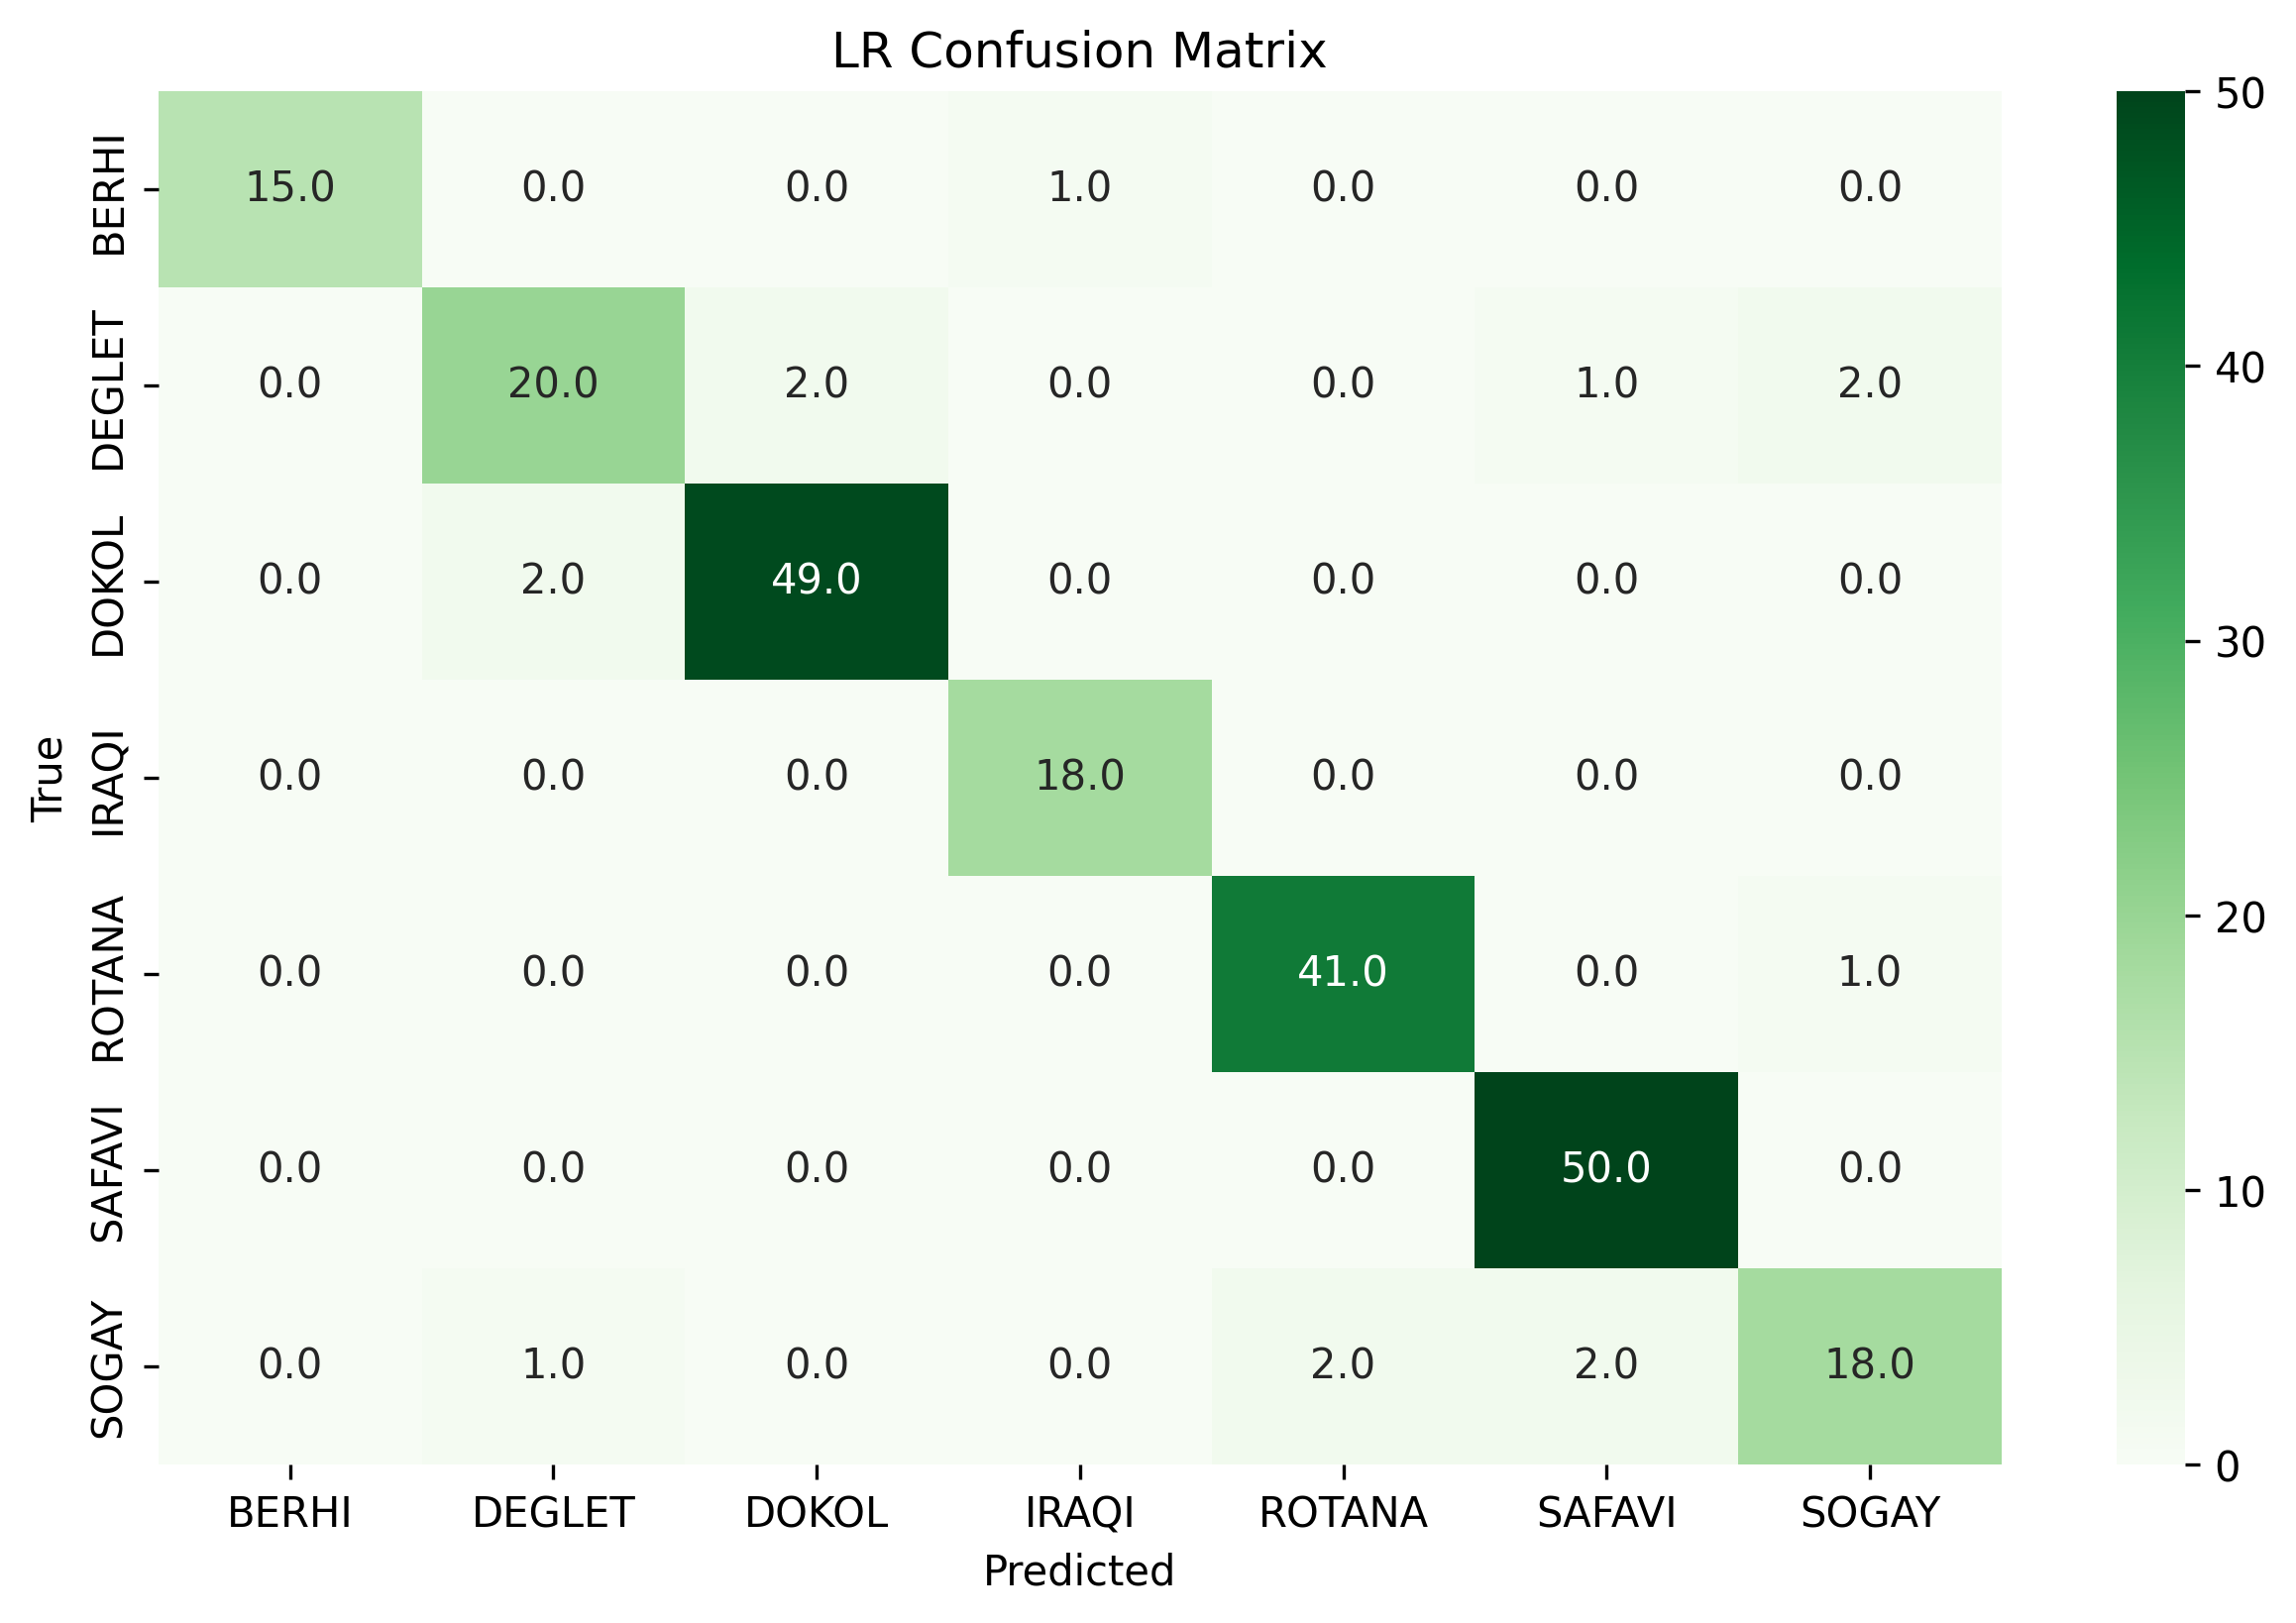

In [52]:
yhat=logreg_model.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### 2- support vector machine model

In [32]:
evaluate_(svm_model)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.001, 'kernel': 'sigmoid'}
accuracy : 0.921268656716418
the model accuracy on test data is: 0.9333333333333333


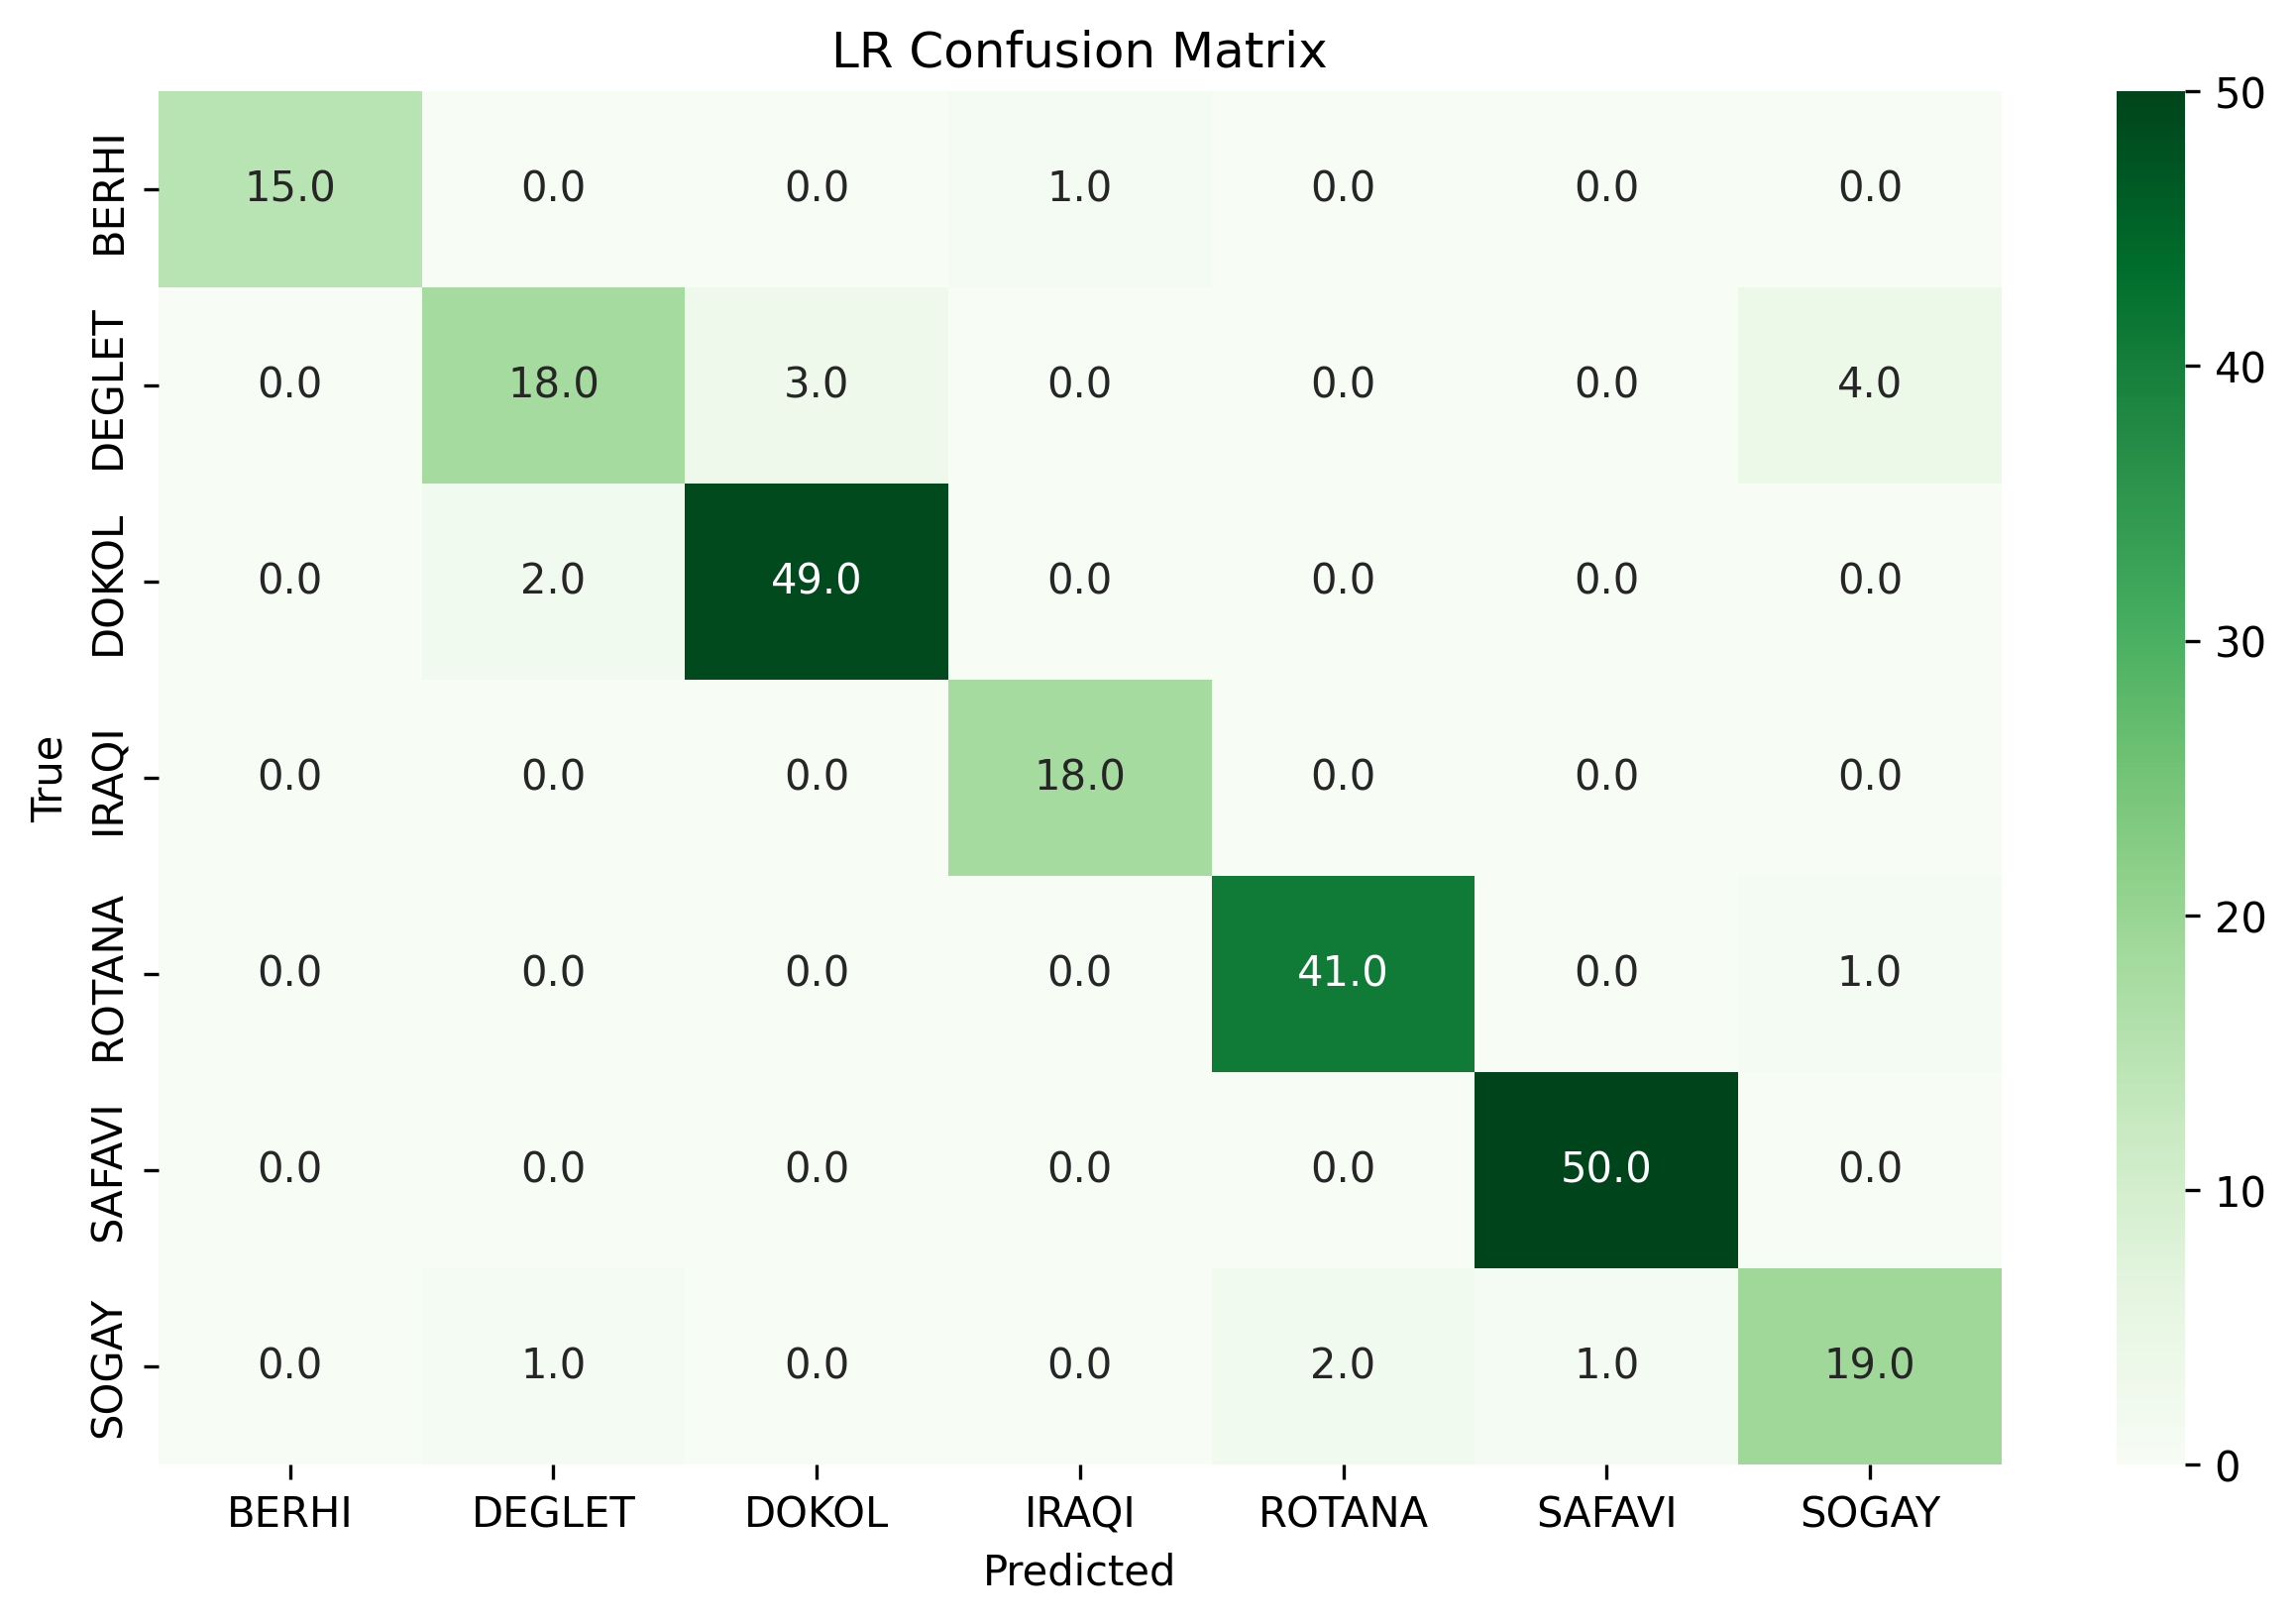

In [53]:
yhat=svm_model.predict(X_test)
plot_confusion_matrix(y_test,yhat)

###3- decision tree classifier model 

In [34]:
evaluate_(tree_model)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8514266900790167
the model accuracy on test data is: 0.8088888888888889


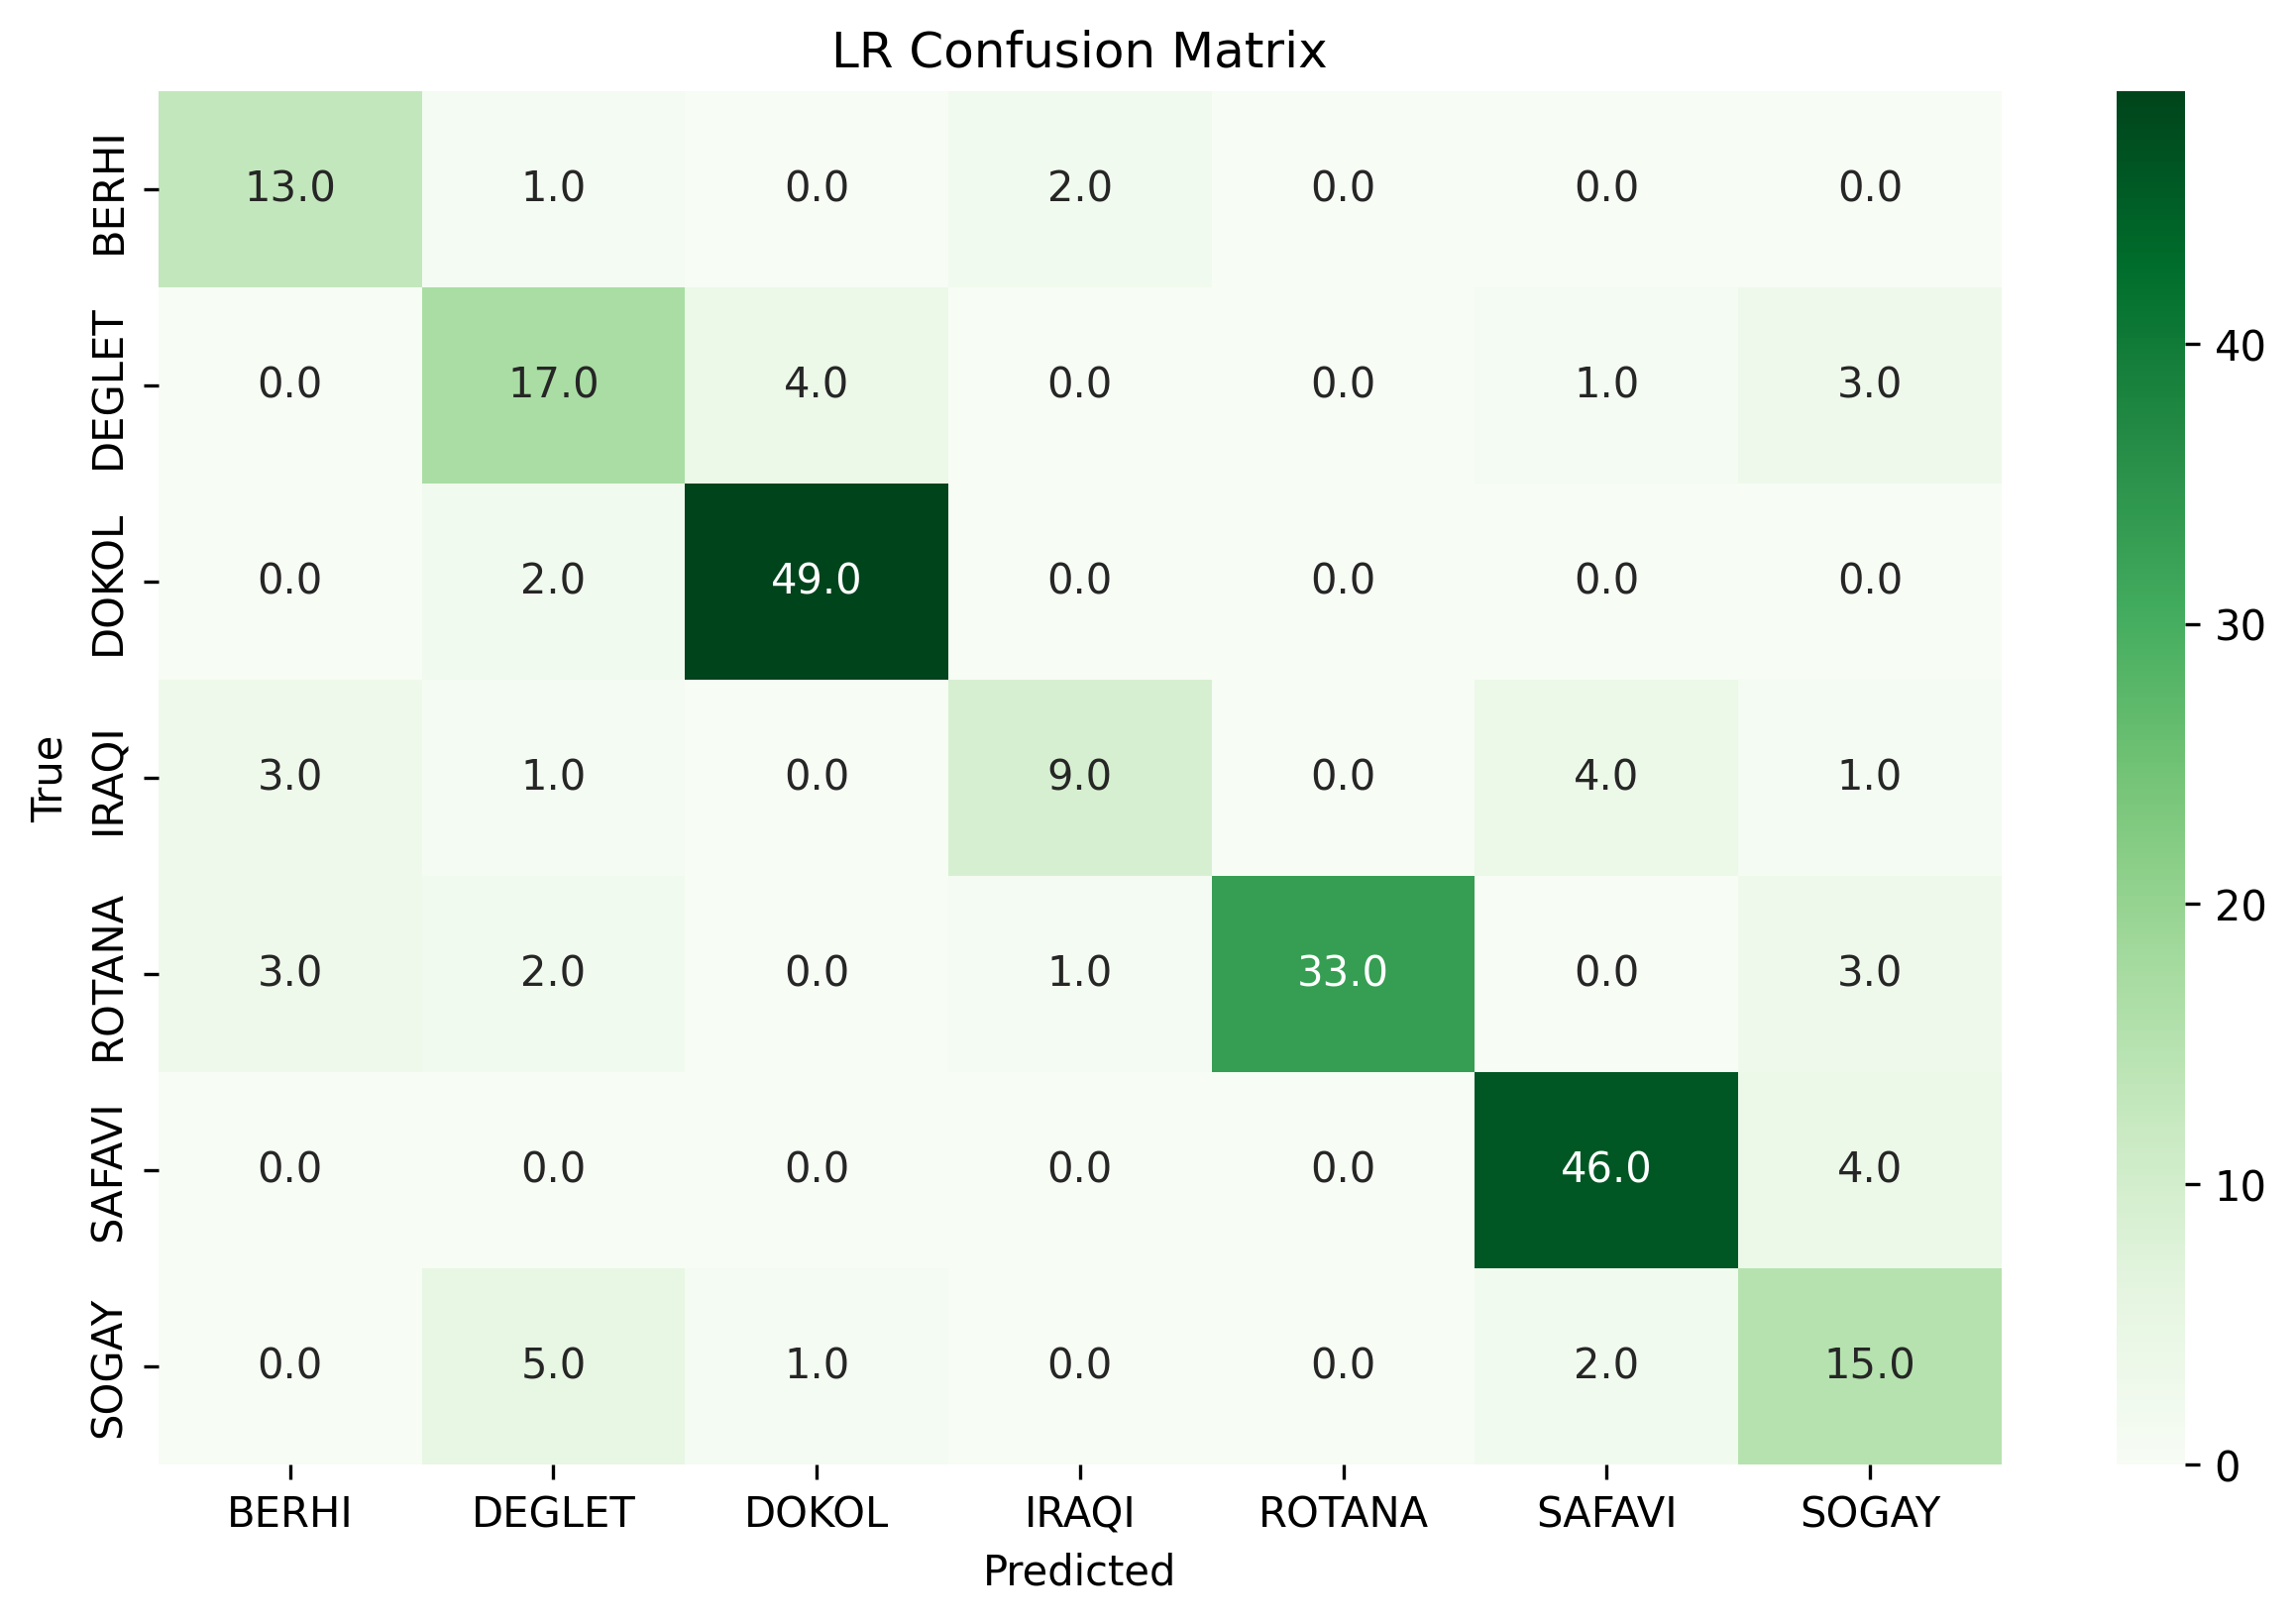

In [54]:
yhat=tree_model.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### 4-k nearest neighboor model 

In [37]:
evaluate_(knn_model)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.8884986830553115
the model accuracy on test data is: 0.8844444444444445


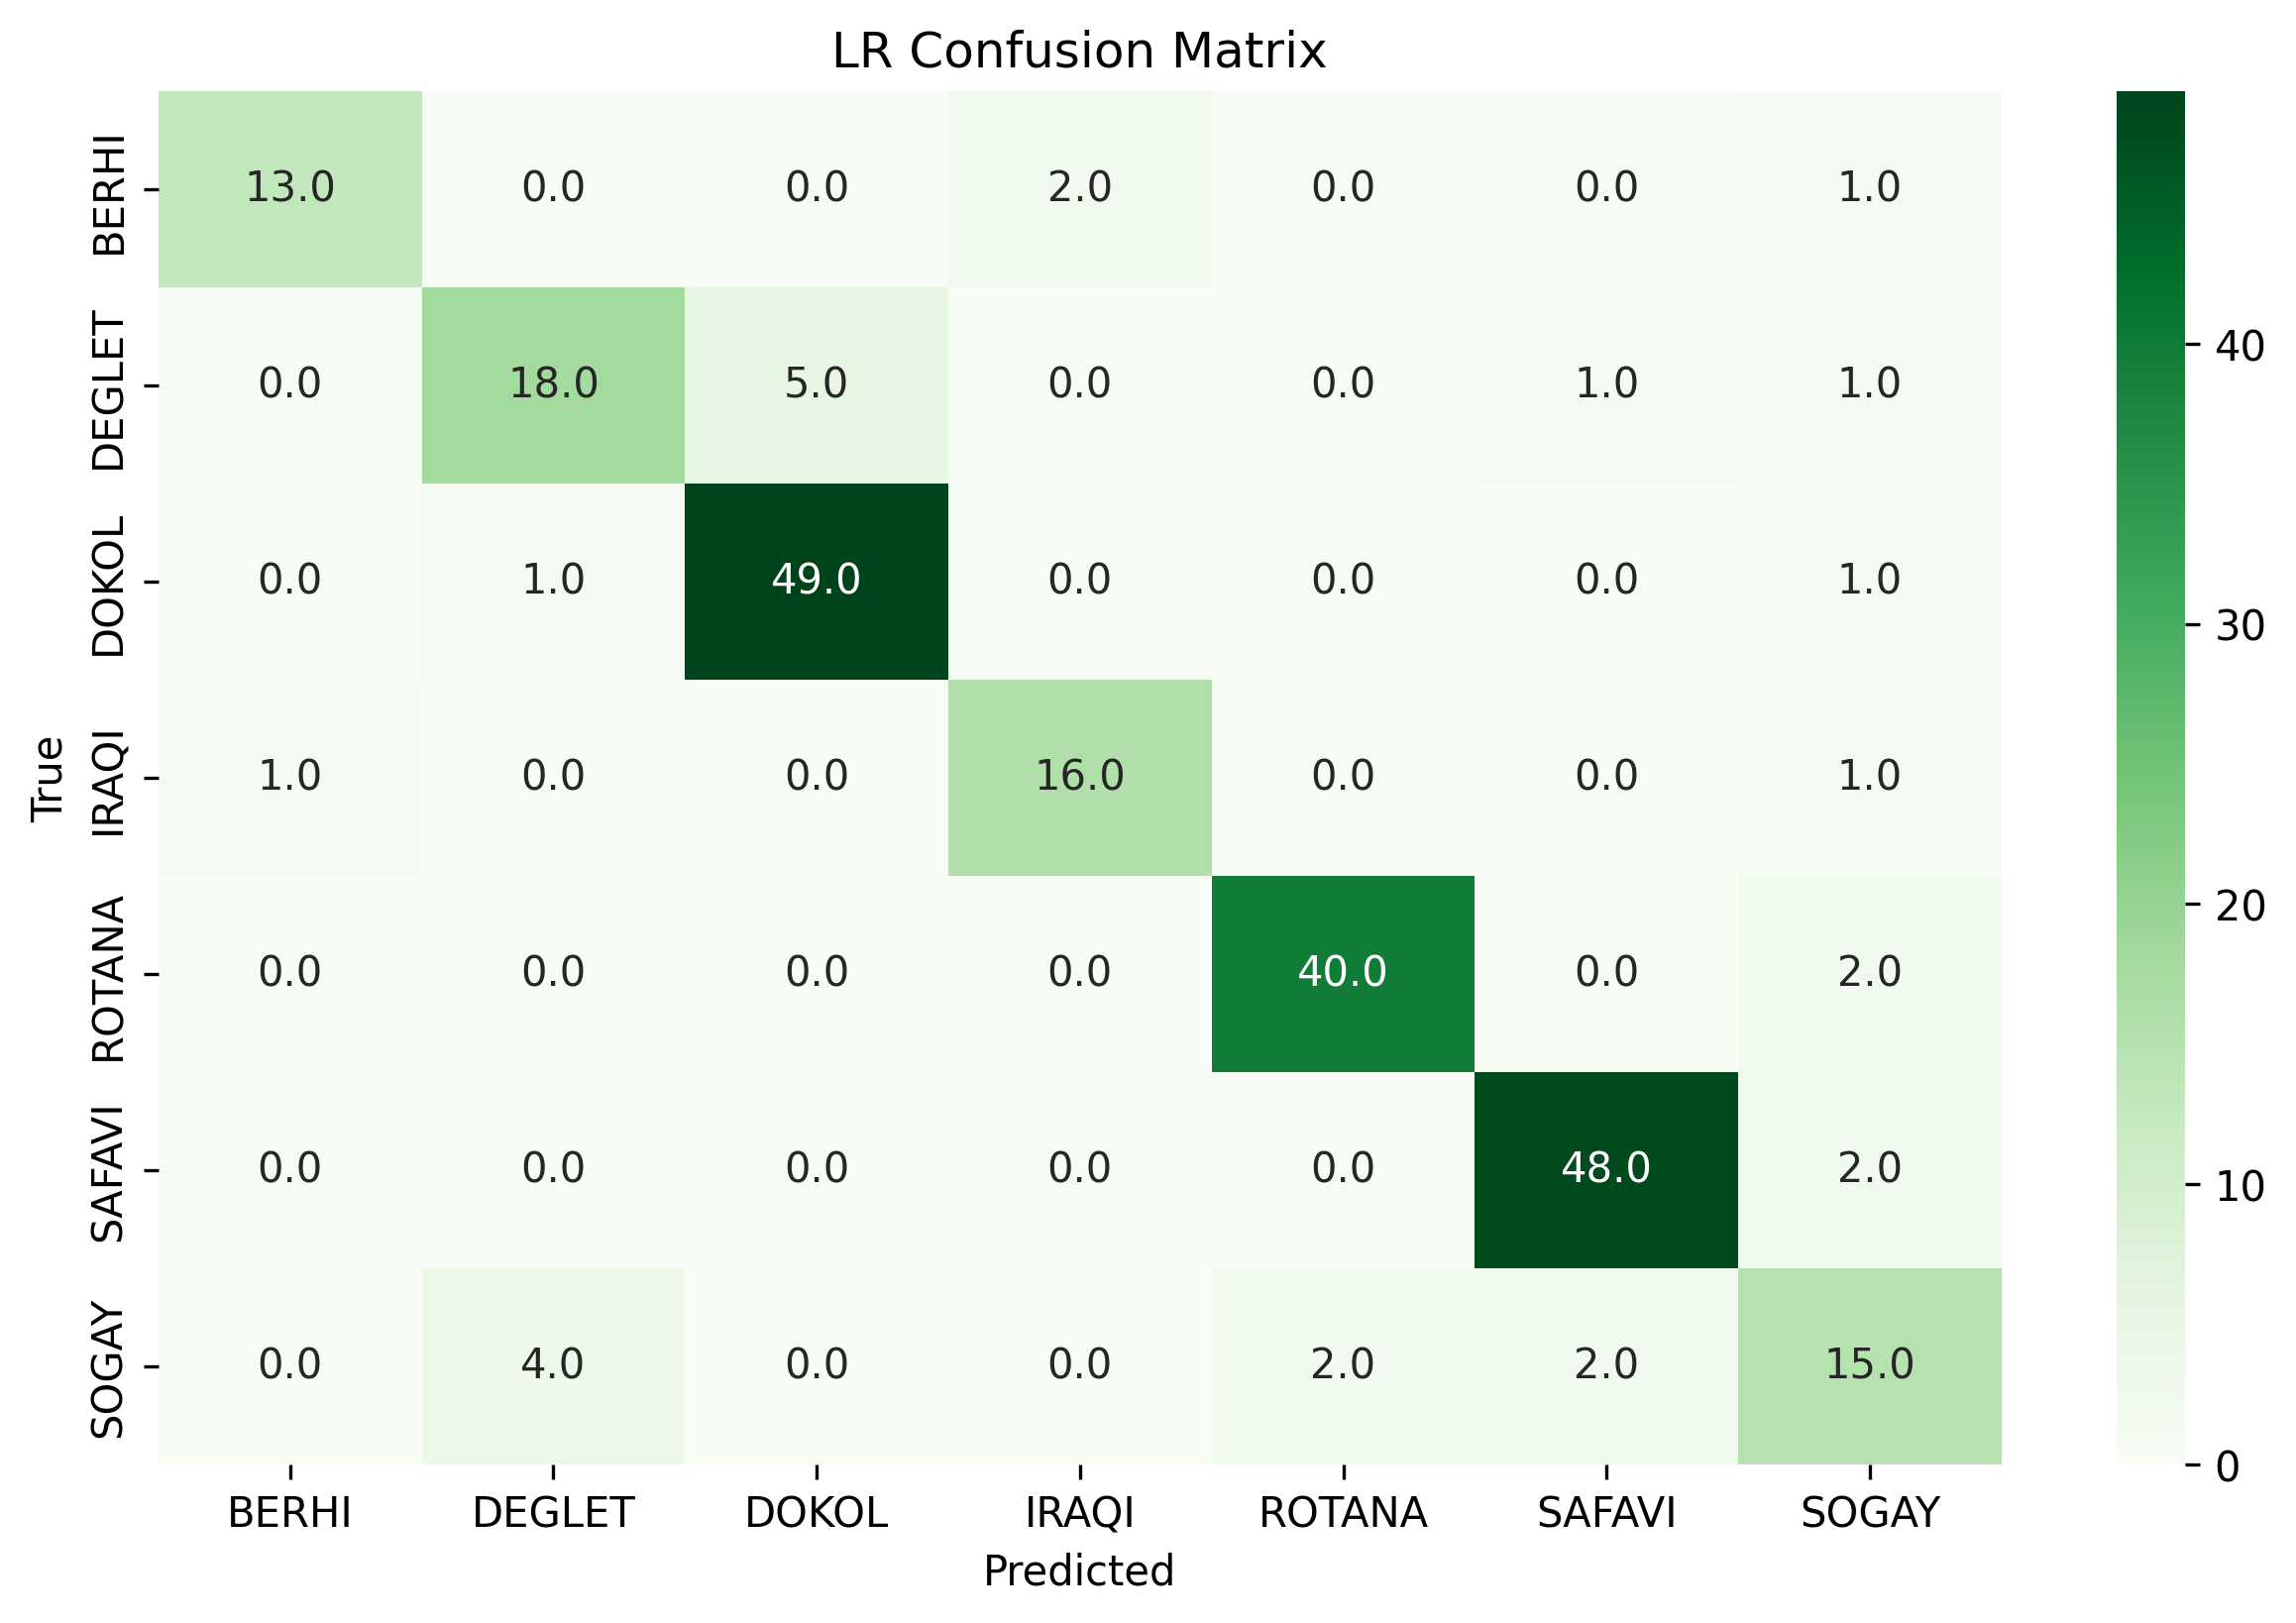

In [55]:
yhat=knn_model.predict(X_test)
plot_confusion_matrix(y_test,yhat)

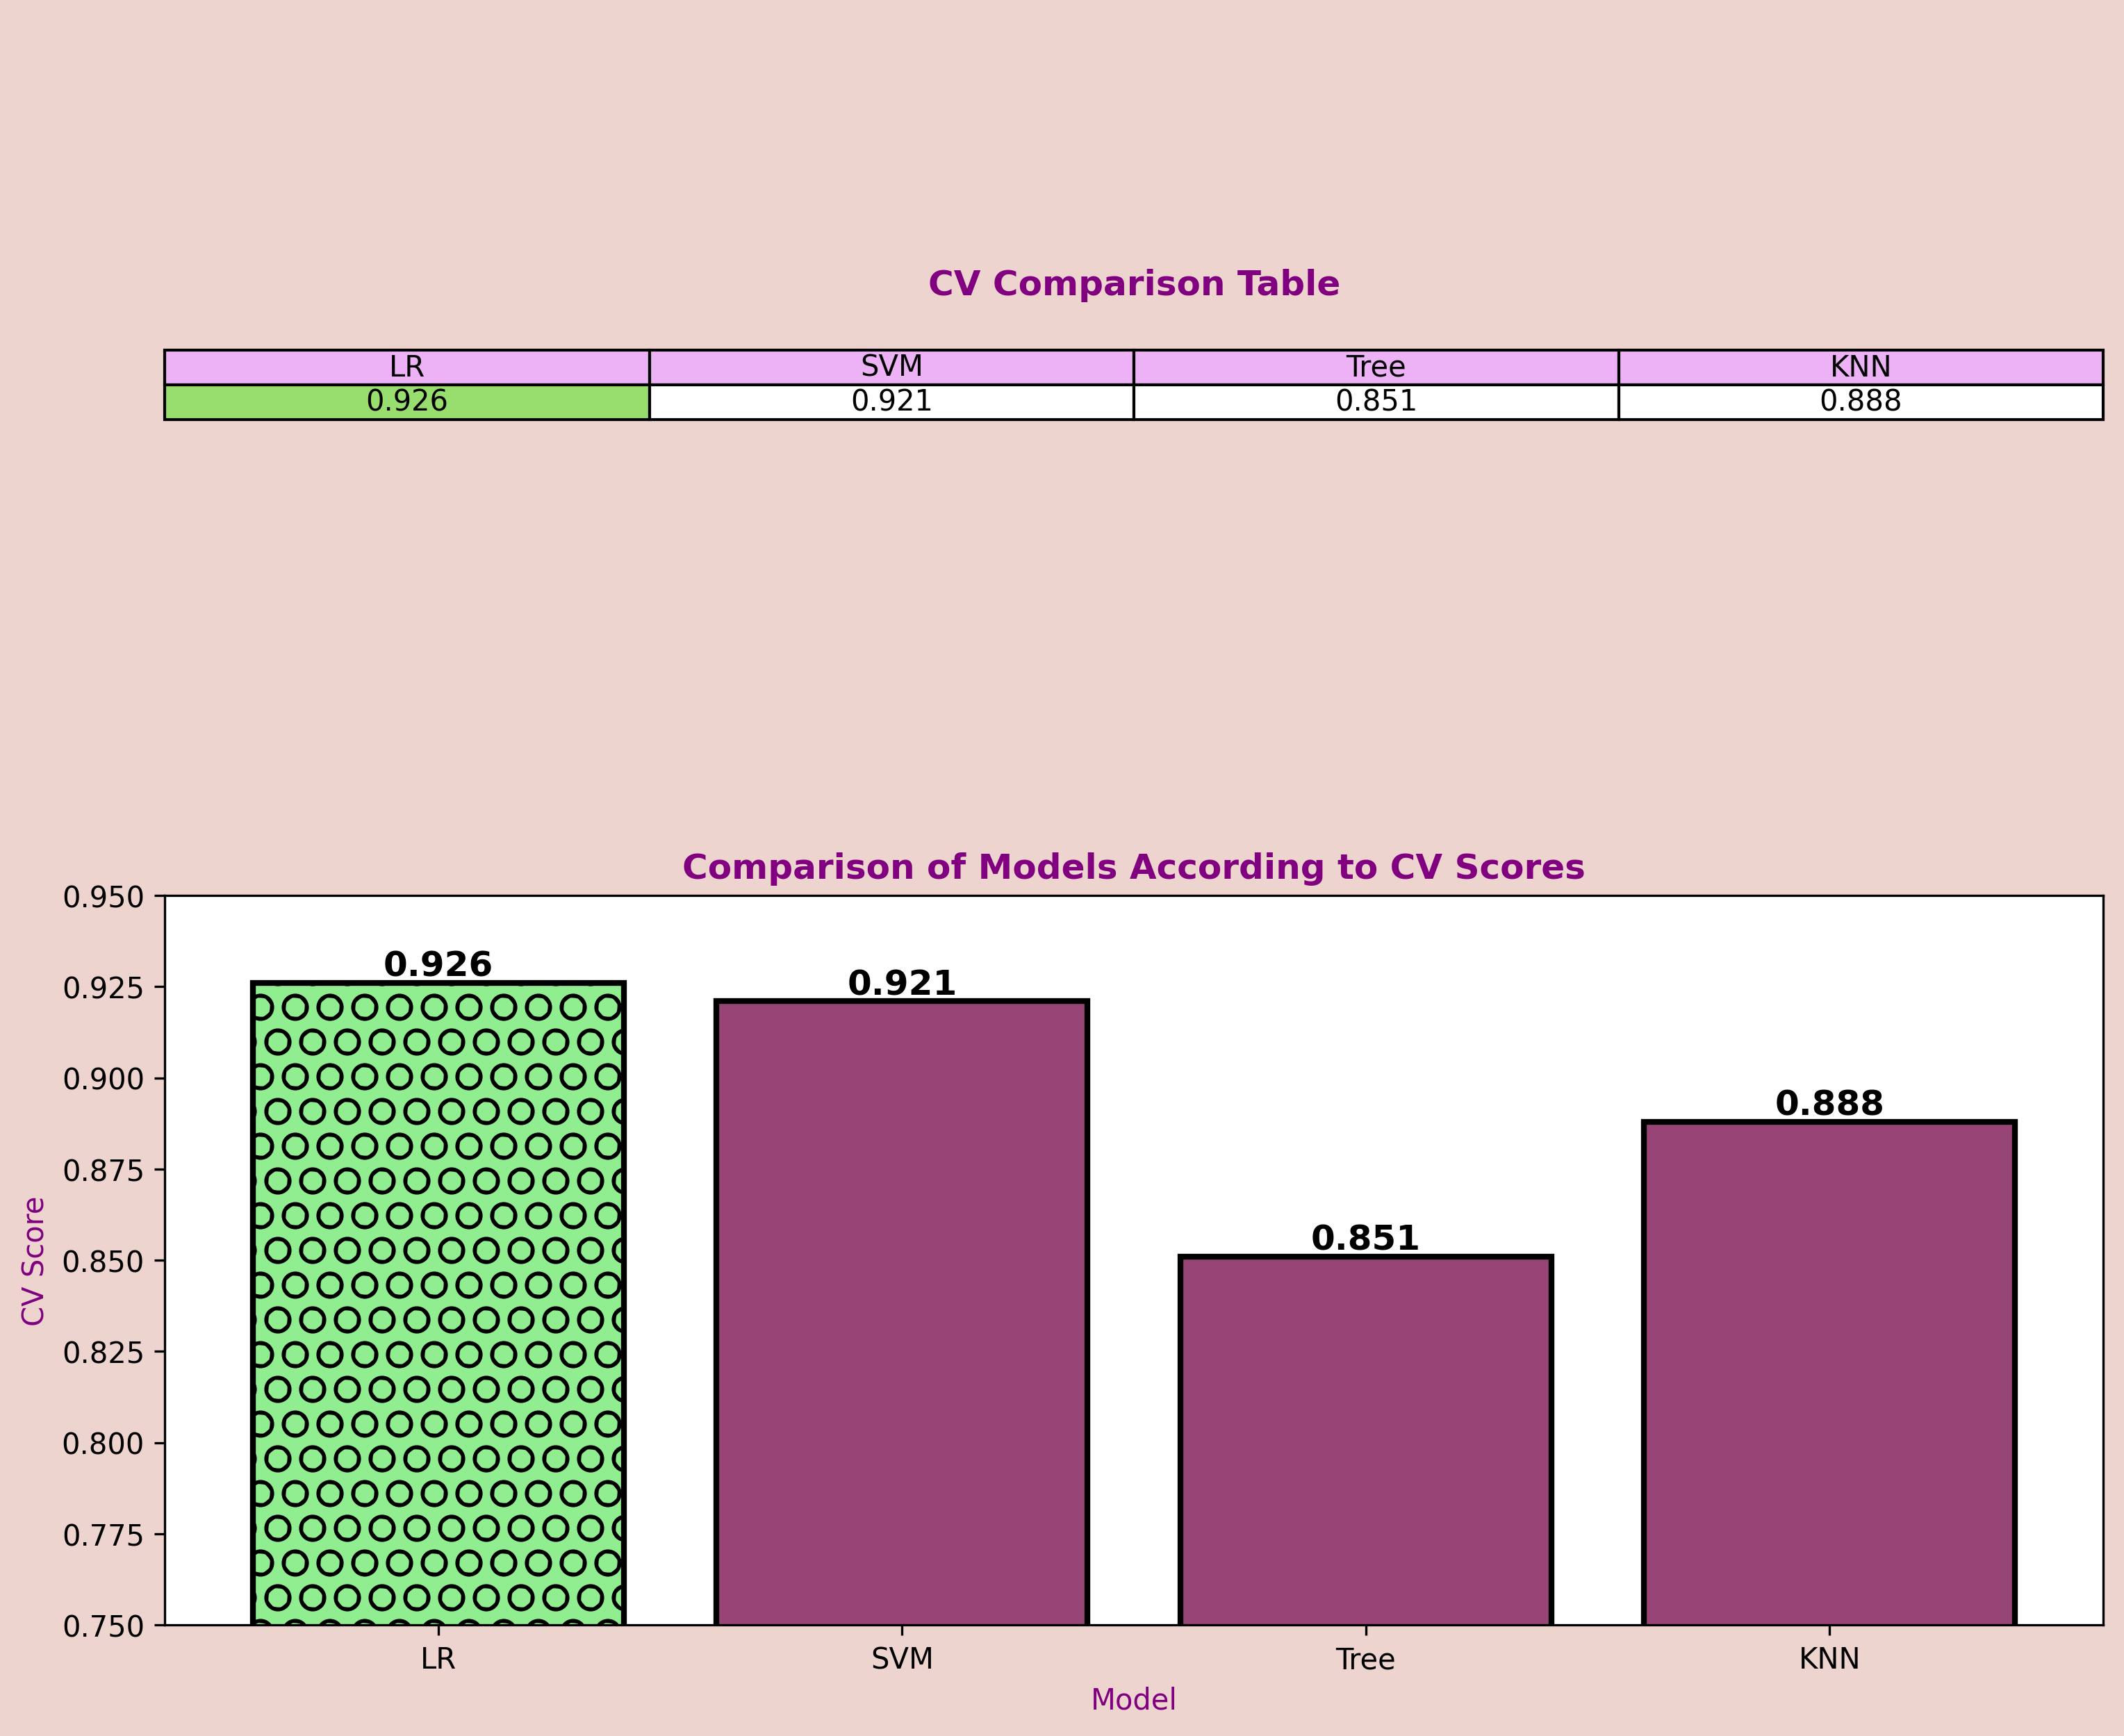

In [39]:
#create a dictionaruy with each model name and its accuracy
cv_dicts = {}

cv_dicts['LR'] = round(logreg_model.best_score_,3)
cv_dicts['SVM'] = round(svm_model.best_score_,3)
cv_dicts['Tree'] = round(tree_model.best_score_,3)
cv_dicts['KNN'] = round(knn_model.best_score_,3)

fig, ax = plt.subplots(2,1, figsize=(12,10), dpi=300, facecolor="#EED4CF")

acc_scores = [list(cv_dicts.values())] #get the accuracy scores from dictionary

collabel = tuple(cv_dicts.keys())
index_max = list(cv_dicts.values()).index(max(list(cv_dicts.values())))

#fist plot
ax[0].axis('tight')
ax[0].axis('off')
the_table = ax[0].table(cellText=acc_scores, colLabels=collabel, loc='center', cellLoc="center")
ax[0].set_title("CV Comparison Table", y=0.6, color="purple", fontweight="bold")

for i in range(0, len(list(cv_dicts.keys()))):
    the_table[(0, i)].set_facecolor("#EDB2F6")
    
color_list = ['lightgreen' if (x == max(list(cv_dicts.values()))) else '#974576' for x in list(cv_dicts.values())]
hatchs = ['O' if (x == max(list(cv_dicts.values()))) else None for x in list(cv_dicts.values())]

the_table[(1, index_max)].set_facecolor("#98DE6F")
#second plot
ax[1].bar(list(cv_dicts.keys()), list(cv_dicts.values()), color = color_list, hatch=hatchs, edgecolor="black", lw=2)
ax[1].set_ylim([0.75, 0.95])
ax[1].bar_label(ax[1].containers[0], fmt='%.3f', color="black", fontsize=12, fontweight="bold")
plt.title("Comparison of Models According to CV Scores", color="purple", fontweight="bold")
plt.xlabel("Model", color="purple")
plt.ylabel("CV Score", color="purple")
plt.show()

## Conclusion

Our logistic model is the one with the highest accuracy.
Thanks for reading 



**With love 💓 by Lewis Agbognihoue**



